In [132]:
%load_ext autoreload
%autoreload 2


import pandas as pd
from datetime import timedelta
from pathlib import Path
import os
import sys
from utils.utils import get_git_root
import networkx as nx
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [133]:
project_root = get_git_root()
data_folder = "data"
datafile = "features.csv"

In [134]:
num_prior_days = 10

In [135]:
df = pd.read_csv(Path(project_root, data_folder, datafile))

In [136]:
df.columns

Index(['uid', 'gender', 'race', 'cohort_year', 'is_ios', 'day_survey',
       'act_on_foot_ep_0', 'act_running_ep_0', 'act_walking_ep_0',
       'loc_study_still', 'loc_study_dur', 'loc_study_product', 'loc_home_dur',
       'loc_workout_dur', 'act_in_vehicle_ep_0', 'loc_dist_ep_0',
       'loc_social_dur', 'loc_food_dur', 'loc_visit_num_ep_0',
       'loc_social_unlock_duration', 'loc_food_unlock_duration',
       'loc_social_unlock_num', 'loc_food_unlock_num', 'loc_social_still',
       'loc_food_still', 'act_running_ep_0_plus_act_walking_ep_0',
       'loc_social_dur_plus_loc_food_dur',
       'loc_social_unlock_duration_plus_loc_food_unlock_duration',
       'loc_social_unlock_num_plus_loc_food_unlock_num',
       'loc_social_still_plus_loc_food_still'],
      dtype='object')

In [137]:
df["P1"] = df.apply(
    lambda row: (
        row["act_running_ep_0"] + row["act_walking_ep_0"]
        if row["is_ios"]
        else row["act_on_foot_ep_0"]
    ),
    axis=1,
)

In [139]:
# * count because the definition is product/num and the columns are already average
df["P2"] = df["loc_study_still"] * df["loc_study_still"] * num_prior_days
# * count because the definition is product/num and the columns are already average
df["P3"] = df["loc_home_dur"]
# * count because the definition is product/num and the columns are already average
df["P5"] = df["loc_workout_dur"]

In [140]:
physical = [f"P{i}" for i in range(1, 6, 1)]
physical = ["P1", "P2"]

social = [f"S{i}" for i in range(1, 8, 1)]
sleep = [f"S{i}" for i in range(1, 4, 1)]

In [141]:
df[physical]

,P1,P2
0,8396.2,30211.515772
1,12182.0,29257.664732
2,11753.9,29632.508594
3,13399.3,29847.636522
4,11003.5,30476.715890
...,...,...
34701,859.9,NaN
34702,447.5,NaN
34703,3035.2,30432.376400
34704,3160.6,31536.017366


In [142]:
df[(df["loc_food_still"].notna()) & (df["is_ios"] == 0)]

,uid,gender,race,cohort_year,is_ios,day_survey,act_on_foot_ep_0,act_running_ep_0,act_walking_ep_0,loc_study_still,...,loc_food_still,act_running_ep_0_plus_act_walking_ep_0,loc_social_dur_plus_loc_food_dur,loc_social_unlock_duration_plus_loc_food_unlock_duration,loc_social_unlock_num_plus_loc_food_unlock_num,loc_social_still_plus_loc_food_still,P1,P2,P3,P5
1150,0ba15aa0582c5e825710d42fe3eb231d,F,white,2018.0,0,2018-11-17,3405.666667,0.0,0.0,42.303981,...,32.294395,0.0,1.001512,NaN,NaN,NaN,3405.666667,17896.268206,5.499966,0.0
1151,0ba15aa0582c5e825710d42fe3eb231d,F,white,2018.0,0,2018-11-18,3422.500000,0.0,0.0,42.303981,...,32.294395,0.0,0.751134,NaN,NaN,NaN,3422.500000,17896.268206,4.124974,0.0
1152,0ba15aa0582c5e825710d42fe3eb231d,F,white,2018.0,0,2018-11-21,5673.285714,0.0,0.0,39.200752,...,32.110549,0.0,0.512559,NaN,NaN,NaN,5673.285714,15366.989806,3.378526,0.0
1153,0ba15aa0582c5e825710d42fe3eb231d,F,white,2018.0,0,2018-11-24,4787.600000,0.0,0.0,39.200752,...,32.110549,0.0,0.358791,NaN,NaN,NaN,4787.600000,15366.989806,8.148502,0.0
1154,0ba15aa0582c5e825710d42fe3eb231d,F,white,2018.0,0,2018-11-25,4515.800000,0.0,0.0,39.427601,...,32.110549,0.0,0.358791,NaN,NaN,NaN,4515.800000,15545.357587,8.656920,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34696,ffc4b142e017c162ed4db7b05414fc4b,F,black,2018.0,0,2021-11-13,3240.300000,0.0,0.0,53.748239,...,49.280377,0.0,3.091334,43.323082,18.884761,100.250236,3240.300000,28888.731865,13.405679,0.0
34697,ffc4b142e017c162ed4db7b05414fc4b,F,black,2018.0,0,2021-12-03,1101.300000,0.0,0.0,39.720936,...,36.584831,0.0,0.303304,47.524719,5.275234,73.169662,1101.300000,15777.527514,11.787924,0.0
34703,ffc4b142e017c162ed4db7b05414fc4b,F,black,2018.0,0,2022-01-27,3035.200000,0.0,0.0,55.165548,...,47.555038,0.0,1.951542,53.940130,12.245879,99.995518,3035.200000,30432.376400,17.072267,0.0
34704,ffc4b142e017c162ed4db7b05414fc4b,F,black,2018.0,0,2022-01-30,3160.600000,0.0,0.0,56.156938,...,45.338678,0.0,1.626057,58.329504,17.512757,95.862263,3160.600000,31536.017366,17.705470,0.0


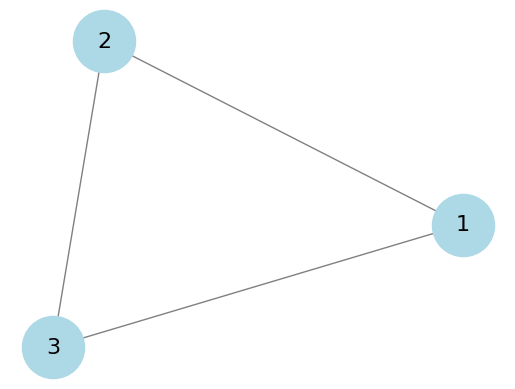

In [143]:
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)

# Add edges
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)

fig, ax = plt.subplots()


# Draw the graph
nx.draw(
    G,
    with_labels=True,
    node_color="lightblue",
    edge_color="gray",
    node_size=2000,
    font_size=16,
    font_color="black",
    ax=ax,
)

In [145]:
fig.savefig(Path(project_root, "temp/graph.png"), dpi=300, bbox_inches="tight")